## Load libraries


The initial step involves loading necessary libraries for data manipulation, visualization, and analysis. These libraries include:

yfinance for downloading historical market data from Yahoo Finance.
numpy and pandas for data wrangling.
seaborn and matplotlib for data visualization.
Custom plotting functions (plot_crash_detections and plot_crash_comparisons) for specific visualization needs.

In [1]:
# Data source
import yfinance as yf

# Data wrangling
import numpy as np
import pandas as pd

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt

from plotting import plot_crash_detections, plot_crash_comparisons

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True, rc={'figure.figsize':(12, 4)})
sns.set_palette(sns.color_palette('muted'))


## Load and explore IXIC time series

The next segment of the code involves downloading the historical data for the IXIC index using the yfinance library and inspecting the data.

Download the IXIC historical data.
Display the first few rows to understand the data structure.
Display the last few rows to see the latest data.
Check the shape of the data to understand its dimensions.

In [3]:
SP500 = yf.Ticker("^IXIC")
sp500_df = SP500.history(period="max")
sp500_df.head()

Open        High         Low       Close  \
Date                                                                        
1971-02-05 00:00:00-05:00  100.000000  100.000000  100.000000  100.000000   
1971-02-08 00:00:00-05:00  100.839996  100.839996  100.839996  100.839996   
1971-02-09 00:00:00-05:00  100.760002  100.760002  100.760002  100.760002   
1971-02-10 00:00:00-05:00  100.690002  100.690002  100.690002  100.690002   
1971-02-11 00:00:00-05:00  101.449997  101.449997  101.449997  101.449997   

                           Volume  Dividends  Stock Splits  
Date                                                        
1971-02-05 00:00:00-05:00       0        0.0           0.0  
1971-02-08 00:00:00-05:00       0        0.0           0.0  
1971-02-09 00:00:00-05:00       0        0.0           0.0  
1971-02-10 00:00:00-05:00       0        0.0           0.0  
1971-02-11 00:00:00-05:00       0        0.0           0.0

In [4]:
sp500_df.tail()

Open          High           Low  \
Date                                                                  
2024-05-31 00:00:00-04:00  16771.900391  16789.269531  16445.539062   
2024-06-03 00:00:00-04:00  16865.699219  16909.890625  16646.429688   
2024-06-04 00:00:00-04:00  16823.880859  16891.869141  16750.390625   
2024-06-05 00:00:00-04:00  16974.480469  17187.919922  16955.560547   
2024-06-06 00:00:00-04:00  17204.900391  17235.726562  17126.873047   

                                  Close      Volume  Dividends  Stock Splits  
Date                                                                          
2024-05-31 00:00:00-04:00  16735.019531  6674090000        0.0           0.0  
2024-06-03 00:00:00-04:00  16828.669922  5422040000        0.0           0.0  
2024-06-04 00:00:00-04:00  16857.050781  4917350000        0.0           0.0  
2024-06-05 00:00:00-04:00  17187.900391  5325000000        0.0           0.0  
2024-06-06 00:00:00-04:00  17184.001953  1114875000        0.0           0.0

In [5]:
sp500_df.shape

(13450, 7)

## Plotting Close Prices
Focus on the Close prices from the downloaded data, and plot the entire time series to visualize historical trends and significant market events, like the dot-com bubble and the 2008 financial crisis.

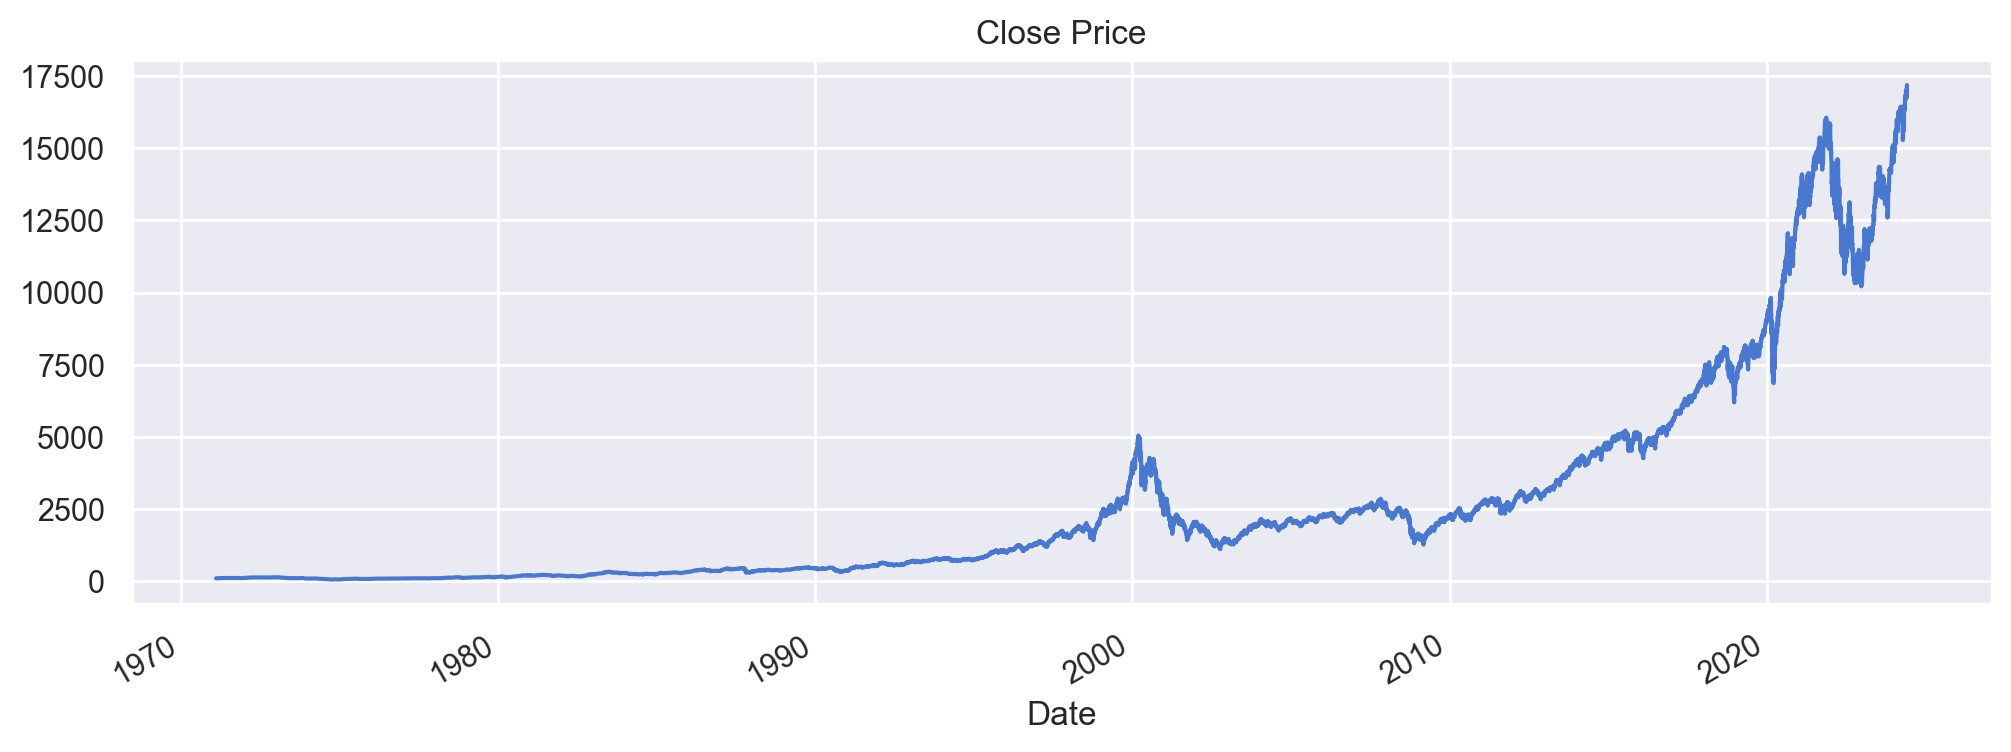

In [6]:
price_df = sp500_df['Close']
price_df.plot()
plt.title('Close Price')
plt.show()

As expected, we can see the bursting of the dot-com bubble between 2000-2004, as well as the 2008 financial crisis.

## Resampling
The markets are closed on weekends, so the data is resampled to ensure evenly spaced daily values. This step is crucial for accurate time series analysis.

Resample the data to daily frequency.
Apply forward fill to handle missing values.
Slice the data to focus on the period from 1980 onwards.

In [7]:
start_year = '1980'
# Resample the DataFrame
price_resampled_df = price_df.resample('24H').ffill()

# Apply slicing from start_year onwards
price_resampled_df = price_resampled_df[start_year:]

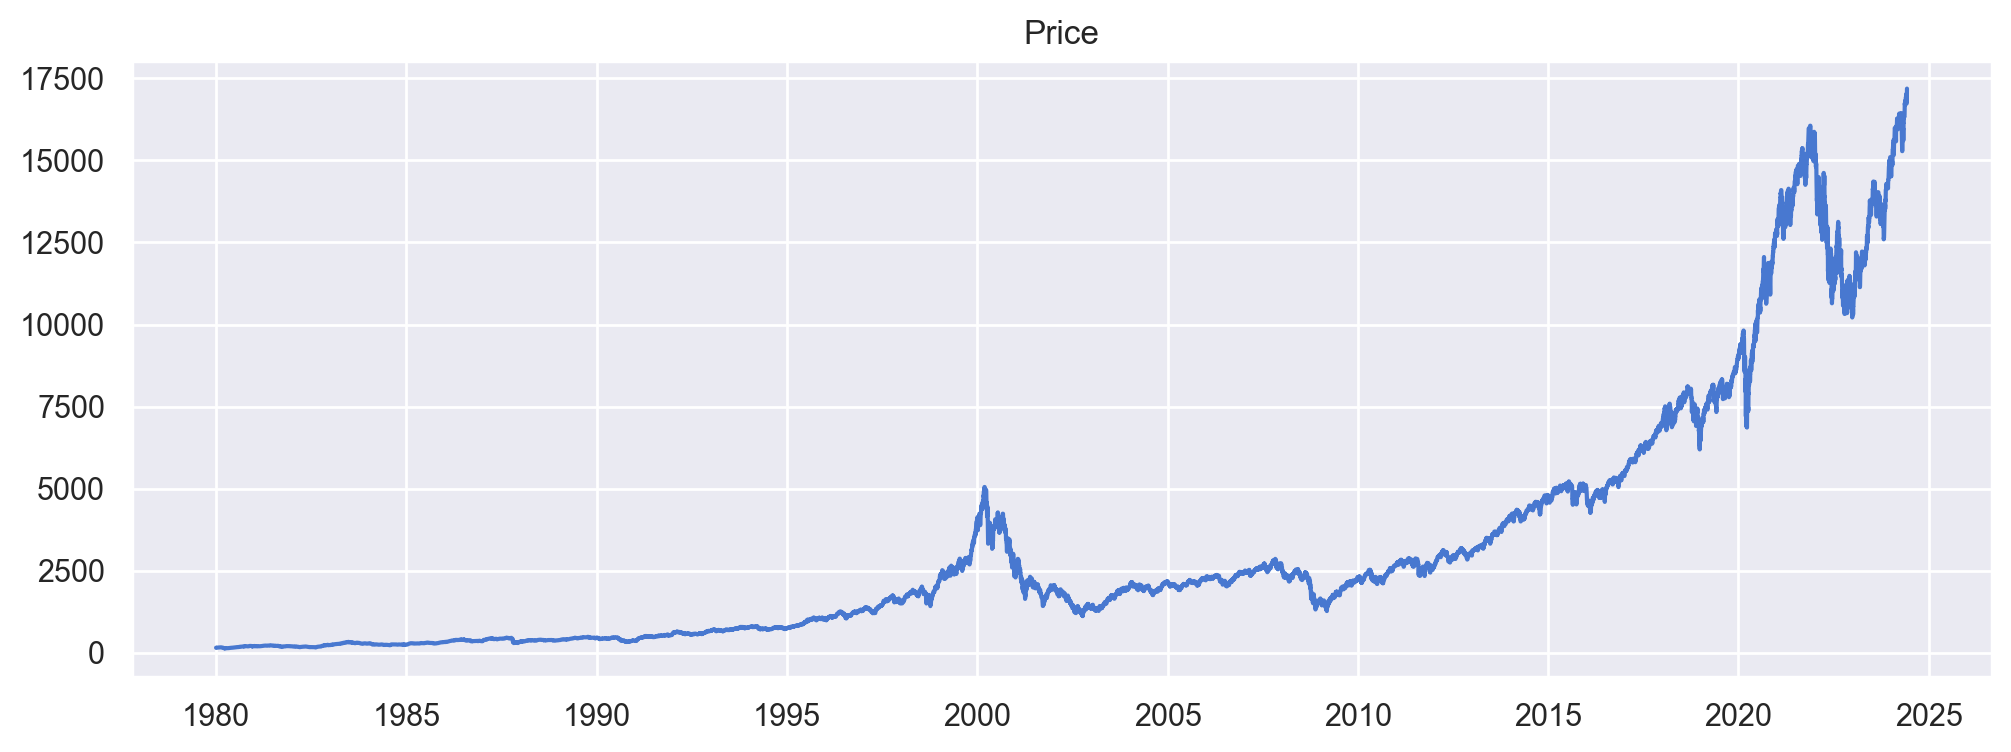

In [8]:
plt.plot(price_resampled_df)
plt.title('Price')
plt.show()

## Time series as point clouds -- Takens' embedding

Discrete time series – that is, time series indexed by a sequence of times $t_0, t_1, \ldots$ – are typically visualised as scatter plots in two dimensions. Points in the plot have times $t_i$ as their horizontal co-ordinates, and the corresponding values $y(t_i)$ of the variable of interest, $y$, as their vertical co-ordinates.

This representation makes the **_local_** behaviour of the time series easy to track by scanning the plot from left to right. But it is often ineffective at conveying important effects which may be occurring over larger time scales.

One well-known set of techniques for capturing **_periodic_** behaviour comes from Fourier analysis. For instance, the [discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_Transform) of a temporal window over the time series gives information on whether the signal in that window arises as the sum of a few simple periodic signals.

Here we want to present a different way of encoding a time-evolving process. It is based on the idea that some key properties of the dynamics (including, but more general than, periodicity or quasi-periodicity as seen by Fourier analysis) can be unveiled very effectively in higher dimensions. We will be able to represent a univariate time series (or a single temporal window over that time series) as a **_point cloud_**, i.e. a set of vectors in a Euclidean space of arbitrary dimension.

The procedure works as follows: we pick two integers $d$ and $\tau$. For each time $t_i \in (t_0, t_1, \ldots )$, we collect the values of the variable $y$ at $d$ distinct times, evenly spaced by $\tau$ and starting at $t_i$, and present them as a vector with $d$ entries, namely $Y_{t_i} = (y_{t_i}, y_{t_i + \tau}, \ldots , y_{t_i + (d-1)\tau})$. The result is a set of vectors in $d$-dimensional space! $\tau$ is called the **_time delay_** parameter, and $d$ the **_embedding dimension_**.

This **_time-delay embedding_** technique is also called **_Takens' embedding_** after Floris Takens, who demonstrated its significance with a celebrated [theorem](https://en.wikipedia.org/wiki/Takens%27s_theorem) in the context of *nonlinear* dynamical systems.

The **_outer window_** allows us to apply Takens embedding locally on a certain interval rather than over the whole time series. The result of this procedure is therefore a time series of point clouds with possibly interesting topologies.

Takens' embedding theorem is applied to transform the time series into higher-dimensional point clouds. This technique helps in capturing periodic behavior and other dynamic properties.

Define embedding dimension and time delay.
Initialize the embedder.
Transform the time series into an array of embeddings.

In [9]:
import gtda.time_series as ts
import gtda.diagrams as diag
import gtda.homology as hl
import gtda.graphs as gr
from gtda.plotting import plot_diagram, plot_point_cloud

In [10]:
embedding_dimension = 3
embedding_time_delay = 2

Next we need to initialise the embedder to represent the price time series as a time series of point clouds:

In [11]:
embedder = ts.SingleTakensEmbedding(
    parameters_type="fixed",
    dimension=embedding_dimension,
    time_delay=embedding_time_delay,
    n_jobs=-1,
)

Now that our embedder is initialised, it is a simple matter to obtain an array of embeddings, where each element is a 3-dimensional vector:

In [12]:
price_values = price_resampled_df.values
price_embedded = embedder.fit_transform(price_values)

embedder_time_delay = embedder.time_delay_
embedder_dimension = embedder.dimension_

## Applying Sliding Window
A sliding window is applied to the embedded data to generate overlapping point clouds. This approach helps in analyzing local behaviors of the time series over specific intervals.

Define window size and stride.
Initialize the sliding window.
Transform the embedded data into point clouds per window.

Next we apply a sliding window to obtain the point clouds per window. We choose the window size such that each interval will span a period of 36 days:

In [13]:
window_size = 31
window_stride = 4

In [14]:
sliding_window = ts.SlidingWindow(size=window_size, stride=window_stride)
price_embedded_windows = sliding_window.fit_transform(price_embedded)

## Visualizing Point Clouds
Visualize one of the generated point clouds to understand the higher-dimensional representation of the time series.

In [15]:
window_num = 42
point_cloud = price_embedded_windows[window_num][:, :3]
plot_point_cloud(point_cloud)

## Baseline Model: First Derivative
A simple baseline model is created by calculating the first derivative of the time series over a sliding window. This model highlights regions with significant changes in the rate of price movement.

Define window size for the price.
Apply the sliding window to the price series.
Calculate the absolute derivative of means.
Plot the first derivative.

In [16]:
window_size_price = window_size + embedder_dimension * embedder_time_delay - 2
sliding_window_price = ts.SlidingWindow(size=window_size_price, stride=window_stride)
window_indices = sliding_window_price.slice_windows(price_values)
price_windows = sliding_window_price.fit_transform(price_values)

In [17]:
abs_derivative_of_means = np.abs(np.mean(np.diff(price_windows, axis=0), axis=1))

In [18]:
# define time index to combine with numpy arrays
indices = [win[1] - 1 for win in window_indices[1:]]
time_index_derivs = price_resampled_df.iloc[indices].index

In [19]:
resampled_close_price_derivs = price_resampled_df.loc[time_index_derivs]

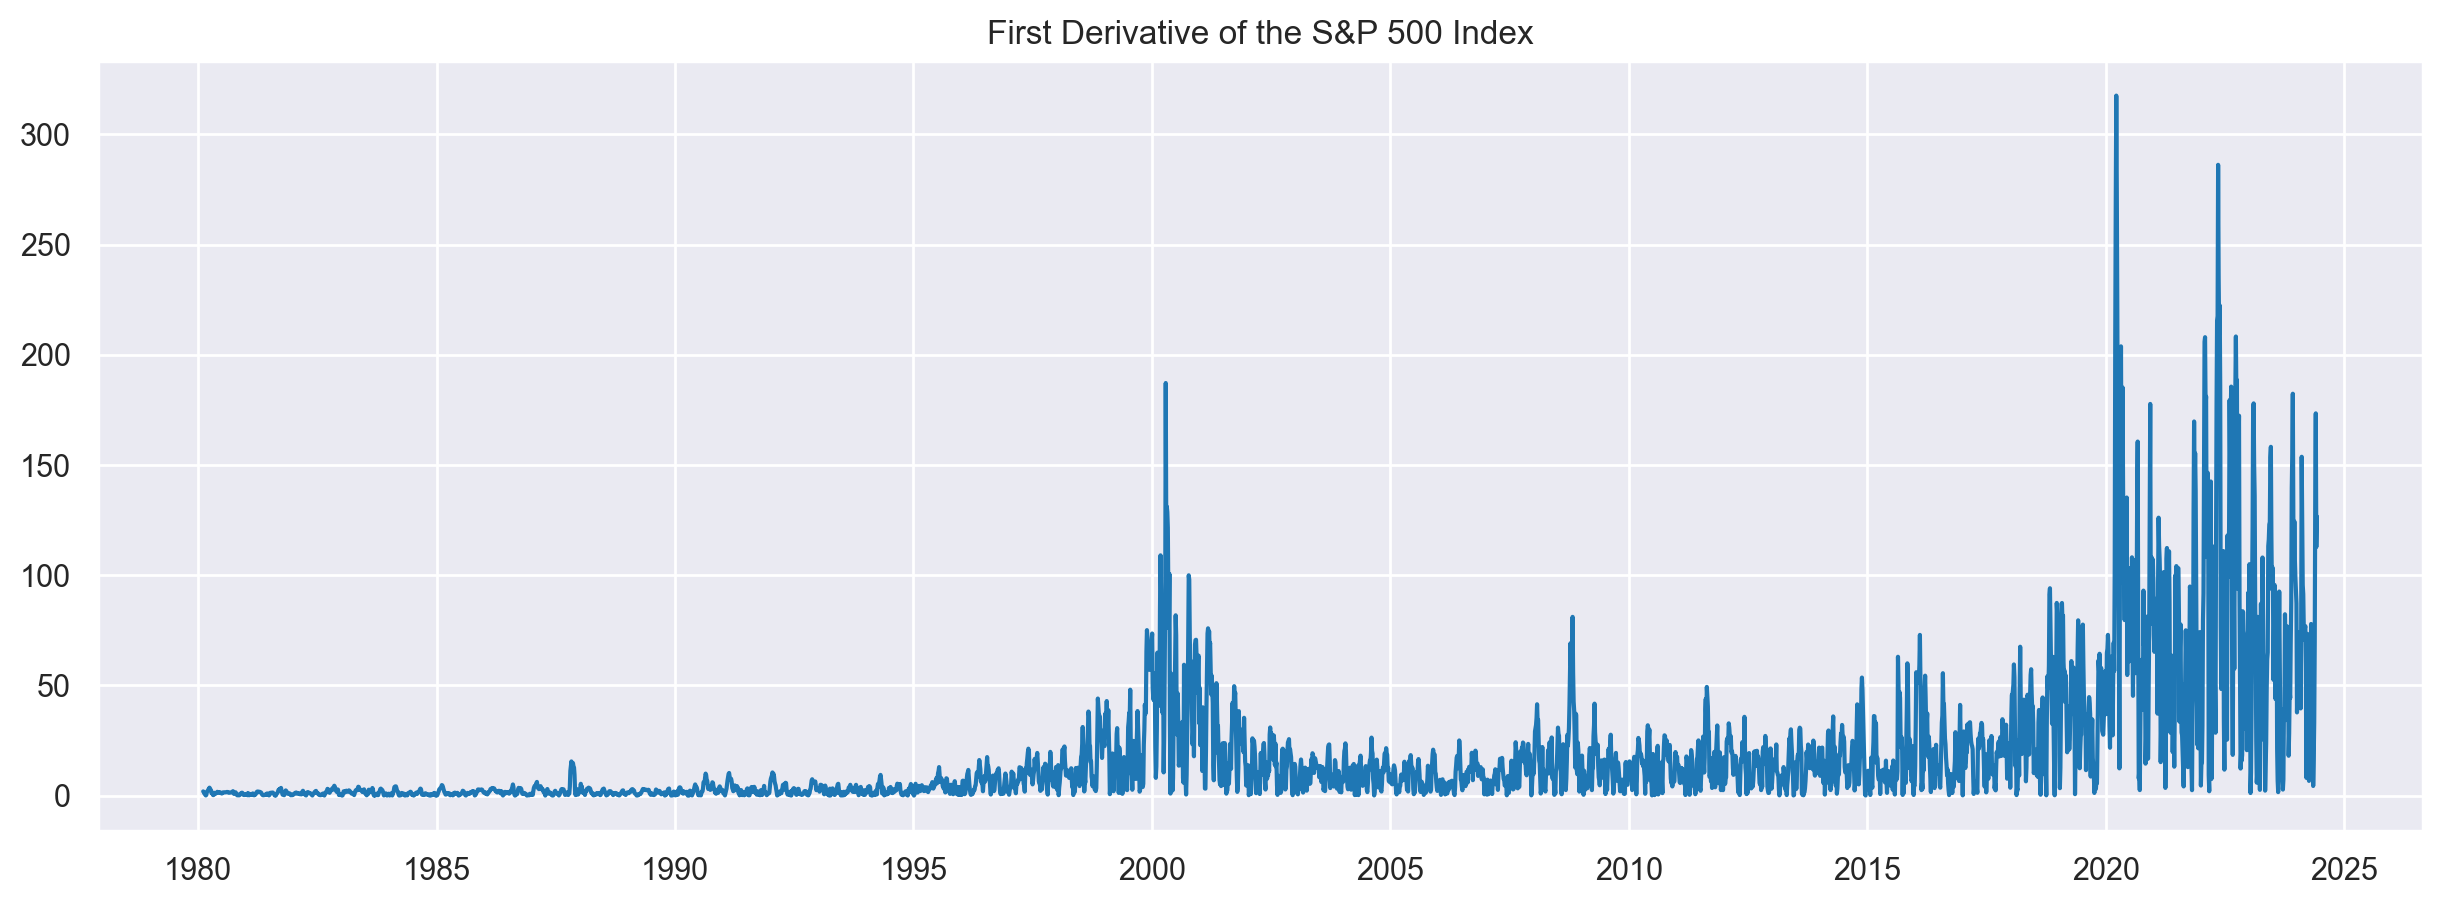

In [20]:
plt.figure(figsize=(15,5))
plt.plot(time_index_derivs, abs_derivative_of_means, color='#1f77b4')
plt.title('First Derivative of the S&P 500 Index')
plt.show()

## Visualizing Crash Detections
The plot of the first derivative is compared with the actual price series to visualize the effectiveness of this simple metric in detecting market crashes.

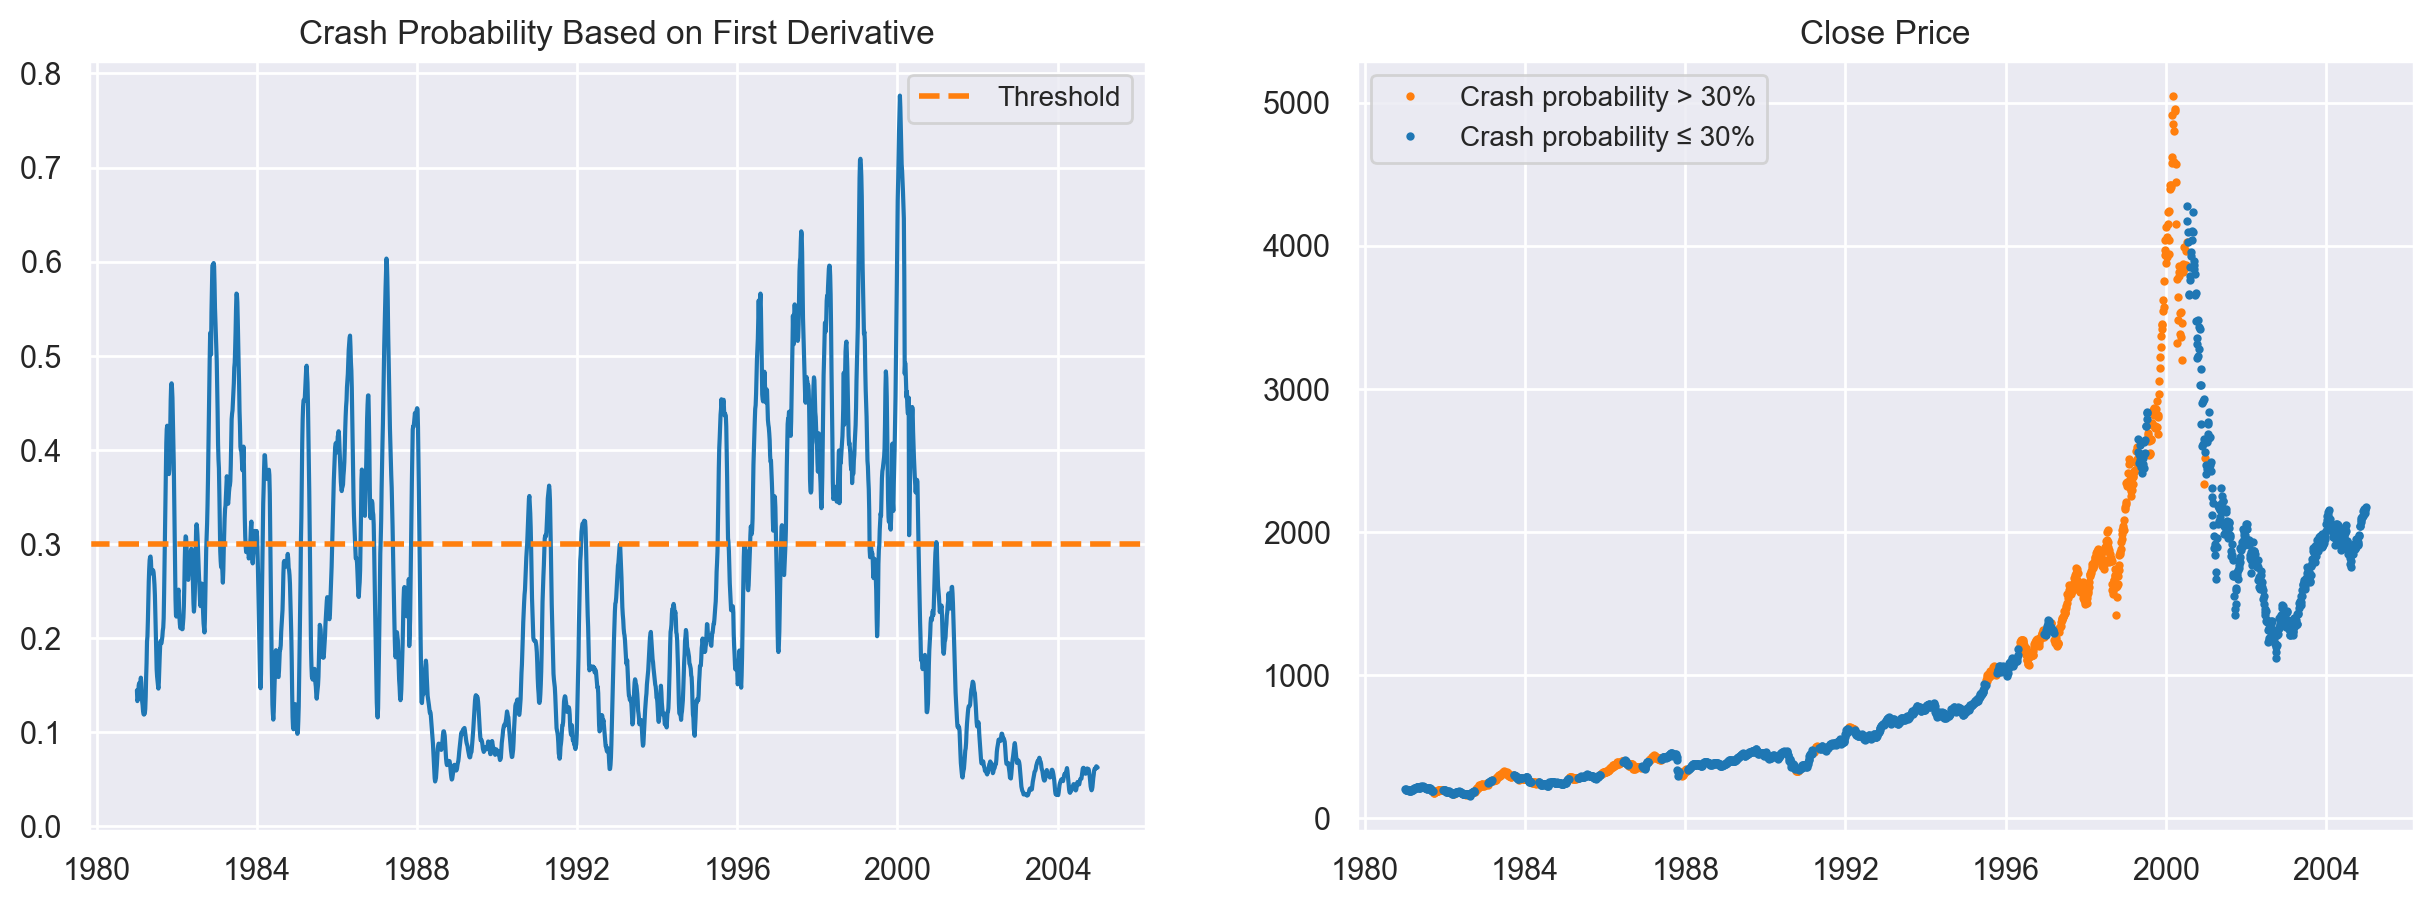

In [21]:
plot_crash_detections(
    start_date="1981-01-01",
    end_date="2005-01-01",
    threshold=0.3,
    distances=abs_derivative_of_means,
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
    metric_name='First Derivative'
)

From the plot we see that the first derivative appears to give an indication of where crashes have happened in the past, albeit with quite some noise around each event. Let's see if we can do better with TDA!

## Persistence diagrams

The first step in a TDA pipeline typically involves calculating persistence diagrams, which encode topological information on the dynamics in the embedding space. The horizontal axis corresponds to the moment in which a homological generator is born, while the vertical axis corresponds to the moments in which an homological generator dies.

In [22]:
# define the number of homology dimensions to track
homology_dimensions = (0, 1)
VR = hl.VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=-1)
diagrams = VR.fit_transform(price_embedded_windows)

In the plot below for a single window, the generators of each homology dimension $H_0$ and $H_1$ are coloured differently:

## Persistence Diagrams
Persistence diagrams are calculated to encode topological information about the dynamics in the embedding space. These diagrams help in understanding the birth and death of homological features over time.



In [23]:
VR.plot(diagrams, sample=window_num)

## Homological derivatives

Given a persistence diagram, there are a number of possible features that can derived from it. For our application, we are interested in calculating the distance between diagrams obtained from two successive windows. Although one can calculate this directly from the `PairwiseDistance` class, we show below how one can make use of `giotto-learn`'s API to create a custom transformer:

In [24]:
from joblib import Parallel, delayed, effective_n_jobs

from sklearn.utils import gen_even_slices
from sklearn.utils.validation import check_is_fitted

from gtda.diagrams import PairwiseDistance
from gtda.diagrams._metrics import _parallel_pairwise, landscapes, betti_curves
from gtda.diagrams._utils import _subdiagrams
from gtda.utils.validation import check_diagrams


class HomologicalDerivative(PairwiseDistance):
    def __init__(self, **kw_args):
        super().__init__(**kw_args)

    def _derivatives_generic(self, X, s):

        return np.array(
            [
                _parallel_pairwise(
                    np.expand_dims(X[t + 1], axis=0),
                    np.expand_dims(X[t], axis=0),
                    self.metric,
                    self.effective_metric_params_,
                    self.homology_dimensions_,
                    self.n_jobs,
                )[0, 0]
                for t in range(s.start, s.stop, 1)
            ]
        )

    def _derivatives(self, subdiagrams, kind, dim, params):
        n_samples, n_points = subdiagrams.shape[:2]
        if kind == "landscape":
            n_layers = min(params["n_layers"], n_points)
            features = landscapes(subdiagrams, params["samplings"][dim], n_layers)
        elif kind == "betti":
            features = betti_curves(subdiagrams, params["samplings"][dim])
        features = (features[1:] - features[:-1]).reshape(n_samples - 1, -1)
        features = np.linalg.norm(features, axis=1, ord=params["p"])

        return (params["step_sizes"][dim] ** (1 / params["p"])) * features

    def fit(self, X, y=None):
        super().fit(X, y)

        return self

    def transform(self, X, y=None):
        check_is_fitted(self, ["effective_metric_params_", "homology_dimensions_"])
        X = check_diagrams(X)

        if self.metric in ["landscape", "betti"]:
            Xt = Parallel(n_jobs=self.n_jobs)(
                delayed(self._derivatives)(
                    _subdiagrams(X[s.start : s.stop + 1], [dim], remove_dim=True),
                    self.metric,
                    dim,
                    self.effective_metric_params_,
                )
                for dim in self.homology_dimensions_
                for s in gen_even_slices(len(X) - 1, effective_n_jobs(self.n_jobs))
            )
            Xt = np.concatenate(Xt)
            Xt = Xt.reshape(len(self.homology_dimensions_), len(X) - 1).T
        else:
            Xt = Parallel(n_jobs=self.n_jobs)(
                delayed(self._derivatives_generic)(X, s)
                for s in gen_even_slices(len(X) - 1, effective_n_jobs(self.n_jobs))
            )
            Xt = np.concatenate(Xt)

        if self.order is not None:
            Xt = np.linalg.norm(Xt, axis=1, ord=self.order)

        return Xt

### Landscape distances

With our transformer defined, let's use it to calculate the successive distance between diagrams using the landscape distance:

## Homological Derivatives
A custom transformer is introduced to calculate the distances between successive persistence diagrams. This measure helps in identifying significant changes in the topological features over time, which can indicate market crashes.

Define the homological derivative class.
Calculate landscape and Betti curve distances between diagrams.
Plot the results to compare with the actual price series.

In [25]:
metric_params = {"p": 2, "n_layers": 10, "n_bins": 1000}

landscape_hom_der = HomologicalDerivative(
    metric="landscape", metric_params=metric_params, order=2, n_jobs=-1
)
landscape_succ_dists = landscape_hom_der.fit_transform(diagrams)

/Volumes/data/tempenv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



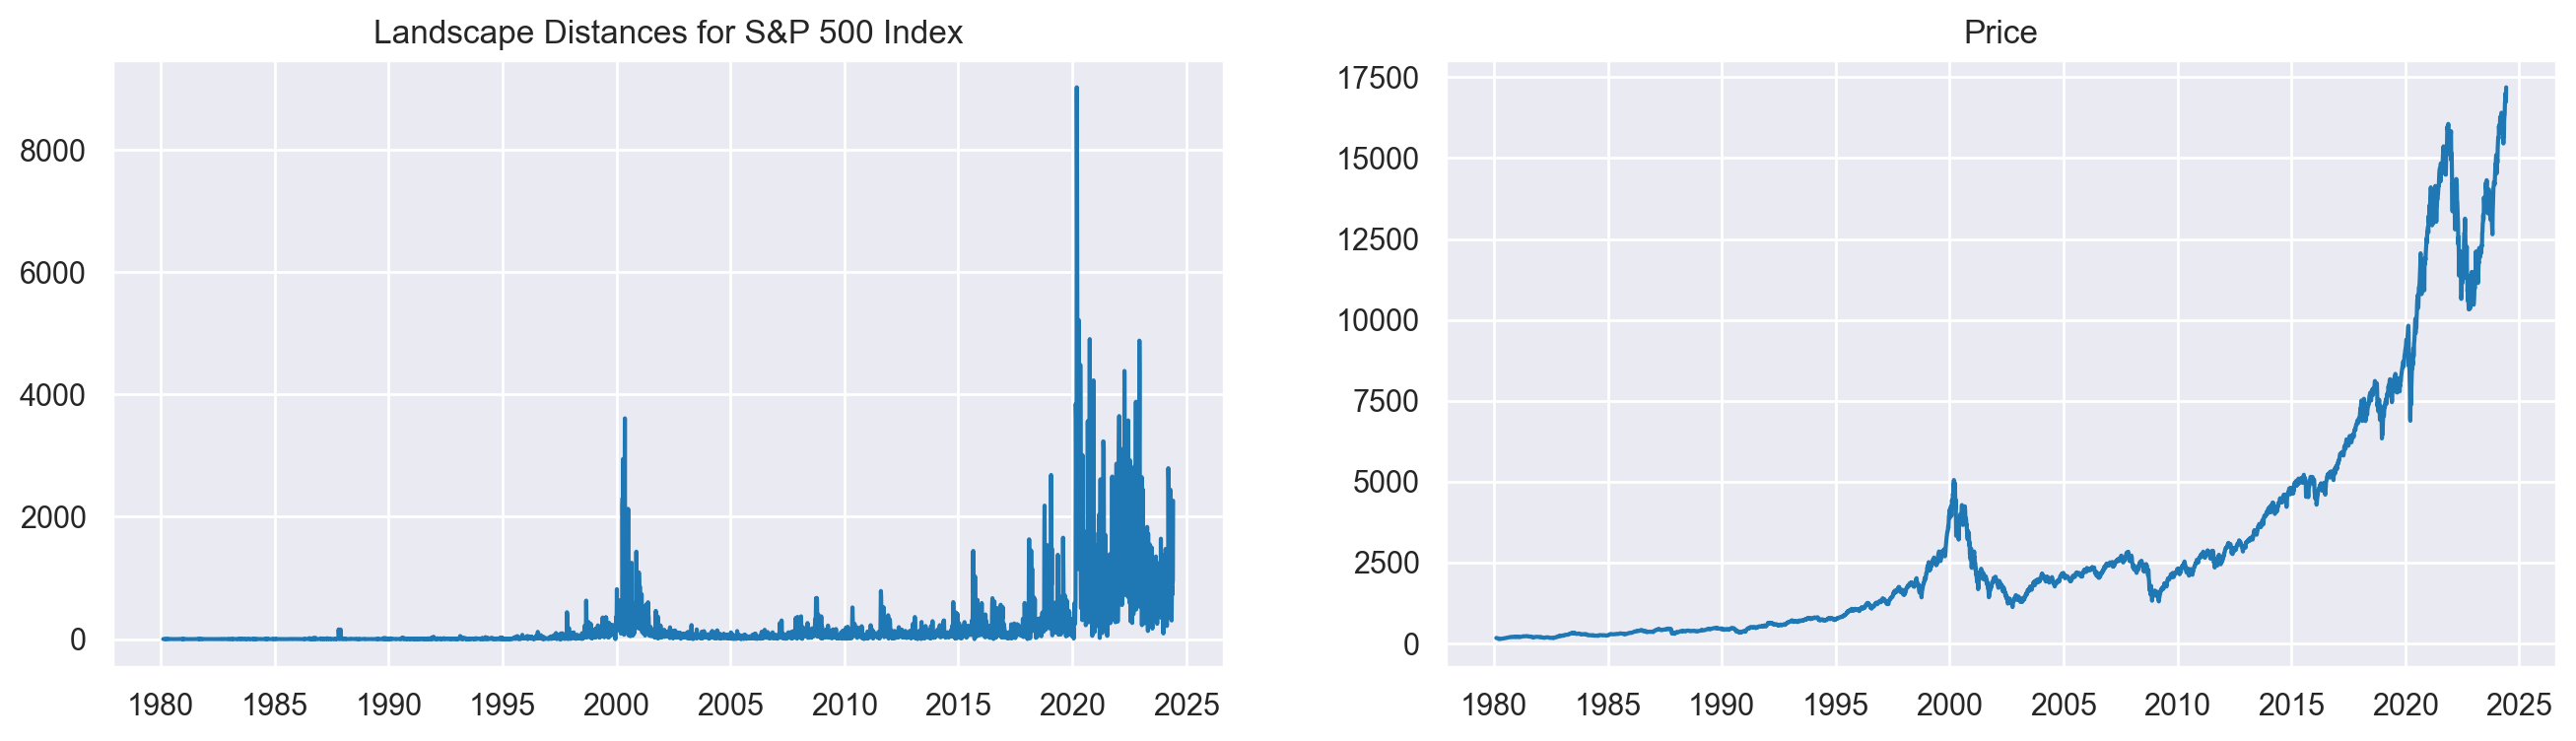

In [26]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(time_index_derivs, landscape_succ_dists, color="#1f77b4")
plt.title("Landscape Distances for S&P 500 Index")

plt.subplot(1, 2, 2)
plt.plot(resampled_close_price_derivs, "#1f77b4")
plt.title("Price")
plt.show()

## Distances among diagrams using Betti curves

In this section we show how to compute distances among persistece diagrams. There are many notions of distances: here we use the $l^p$ *norm of the Betti curves*.

In [27]:
metric_params = {"p": 2, "n_bins": 1000}


bettiHomDer = HomologicalDerivative(
    metric='betti', metric_params=metric_params, order=2, n_jobs=-1
)
betti_succ_dists = bettiHomDer.fit_transform(diagrams)

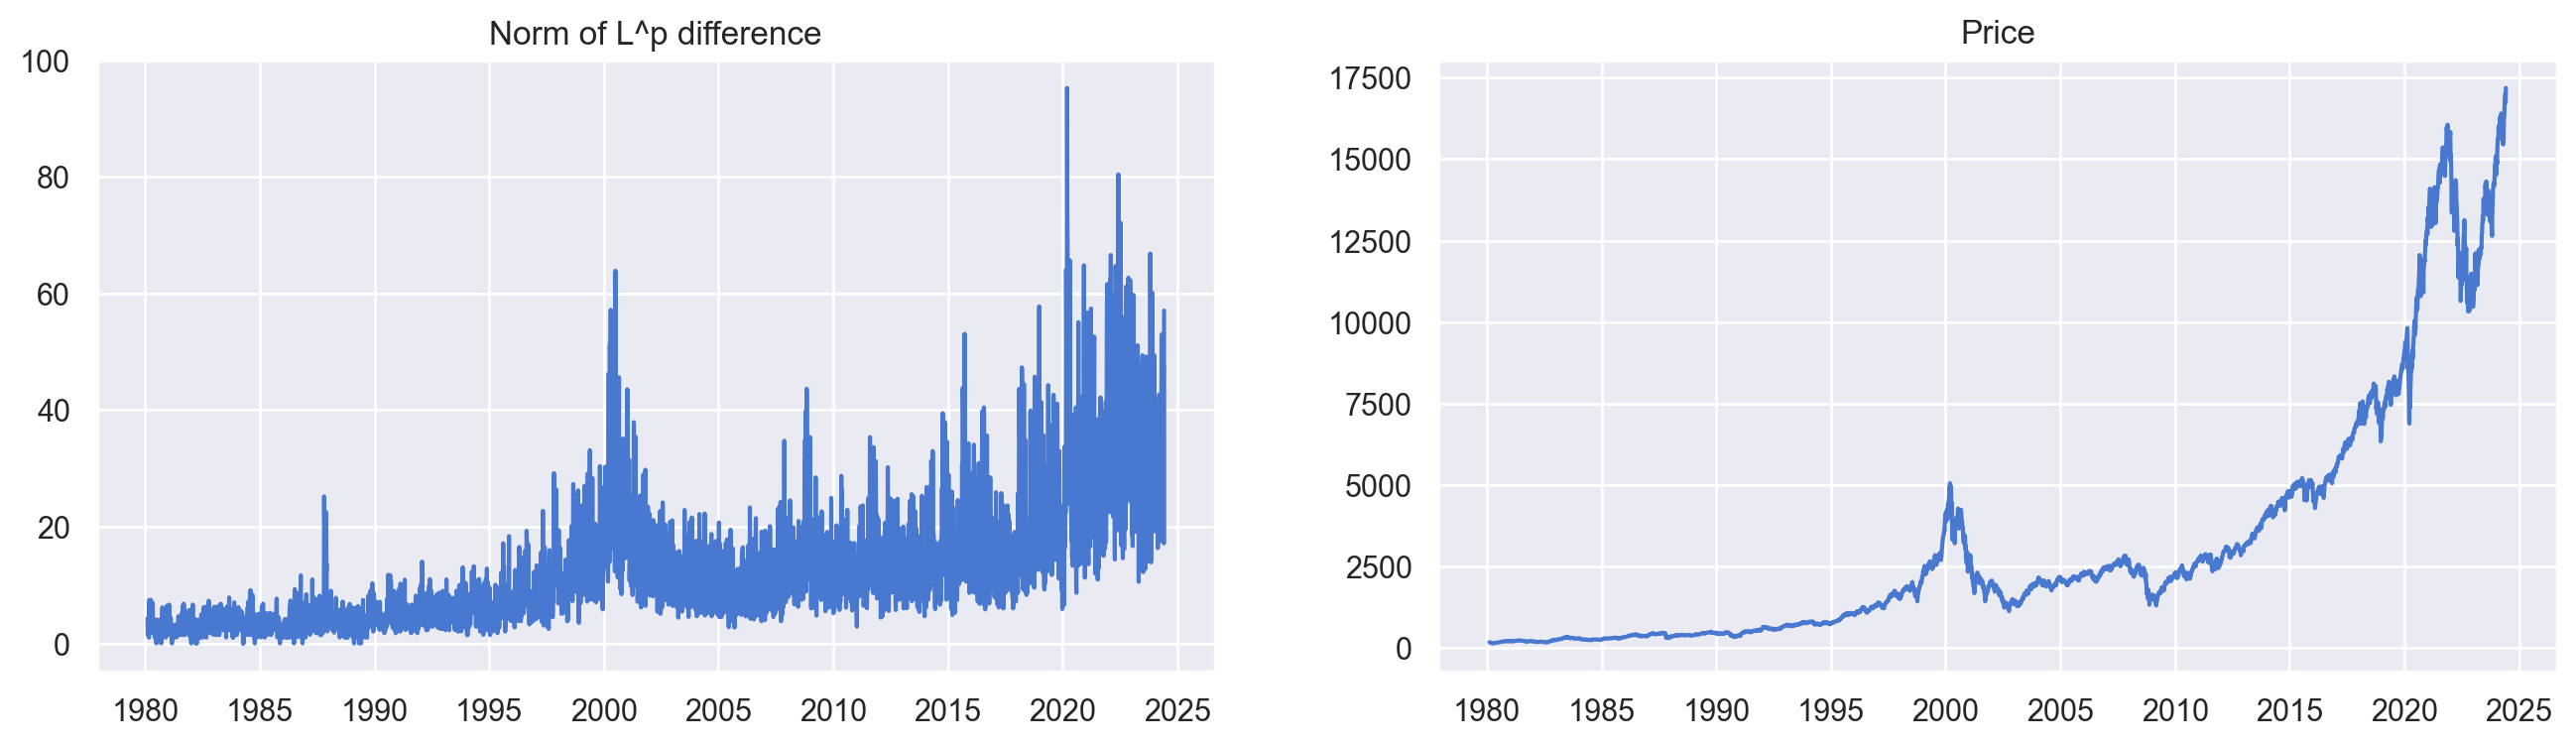

In [28]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(time_index_derivs, betti_succ_dists)
plt.title('Norm of L^p difference')

plt.subplot(1, 2, 2)
plt.plot(resampled_close_price_derivs)
plt.title('Price')
plt.show()

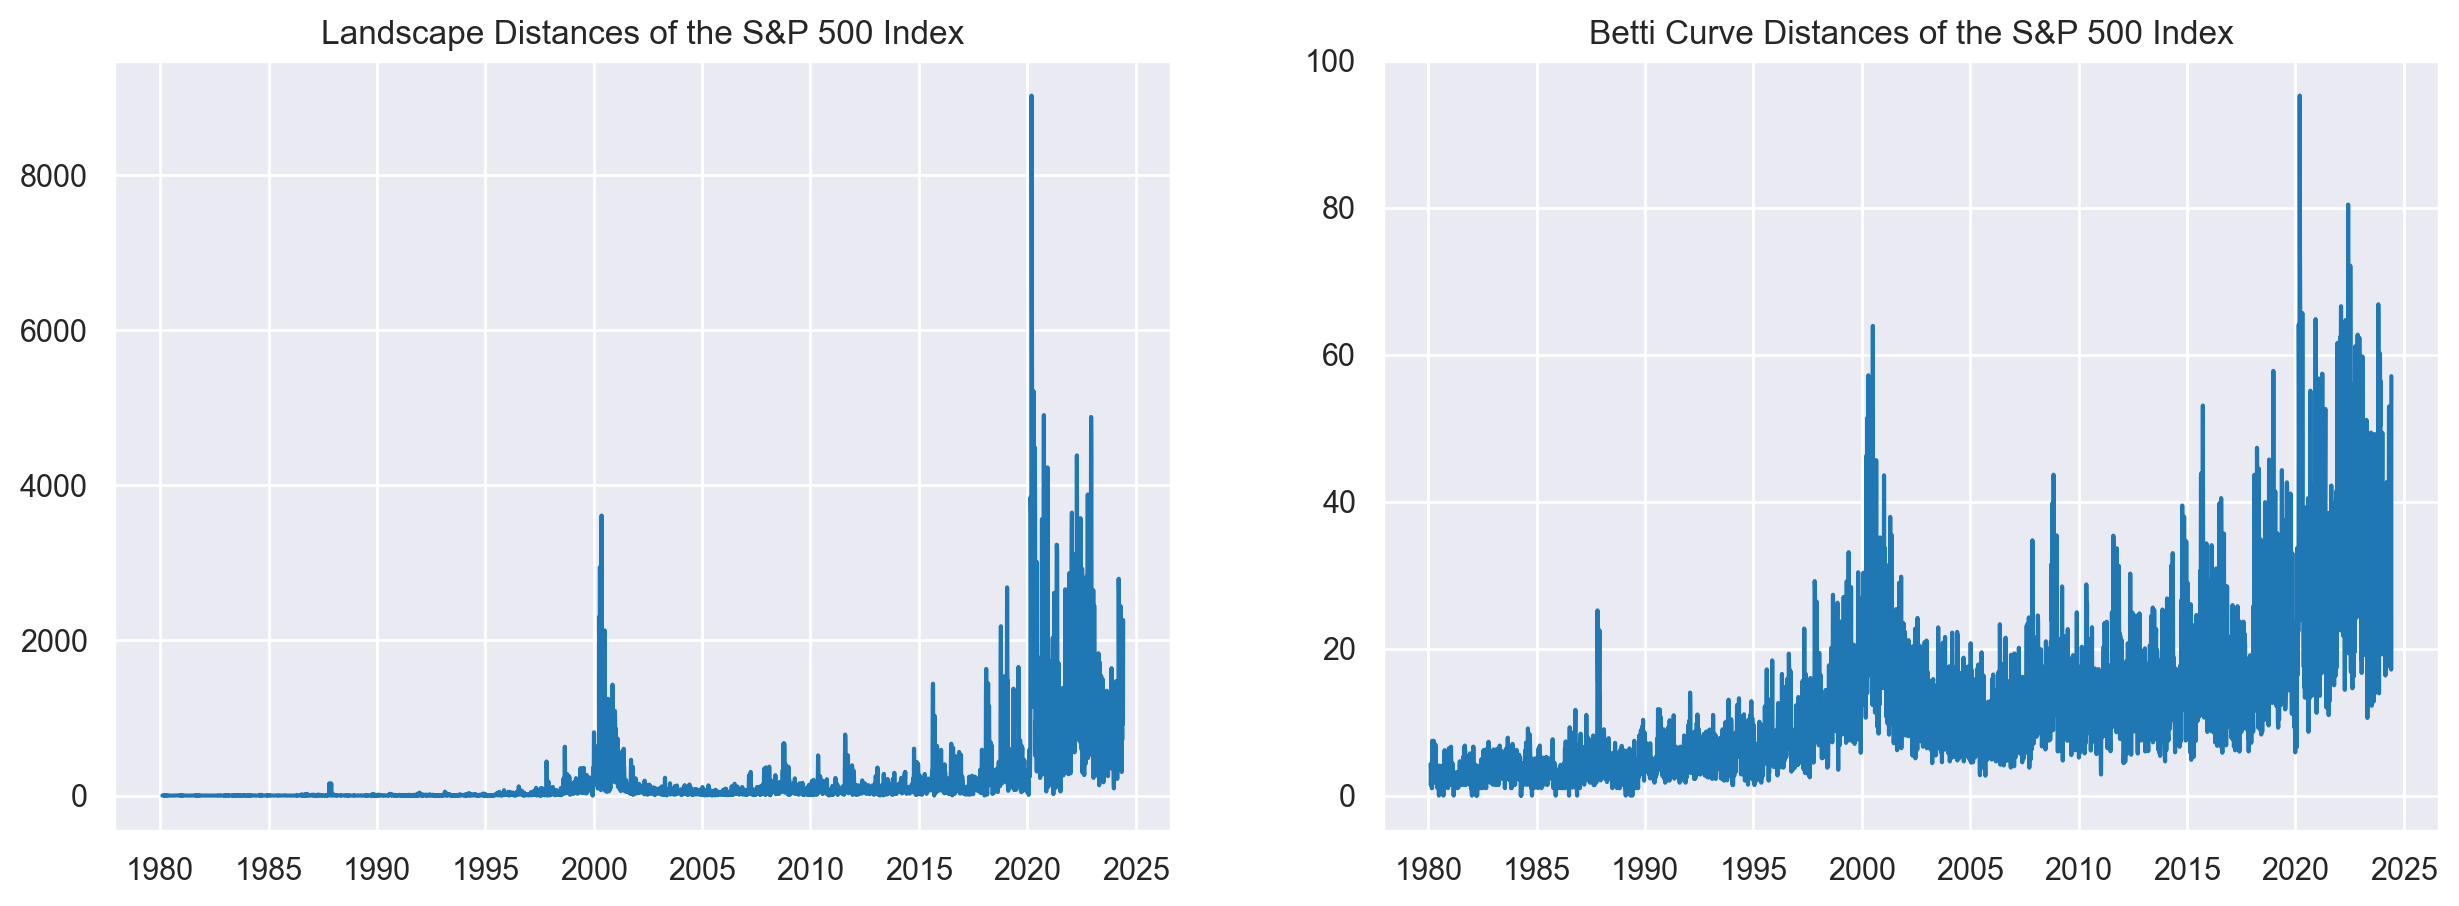

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(time_index_derivs, landscape_succ_dists, "#1f77b4")
plt.title("Landscape Distances of the S&P 500 Index")

plt.subplot(1, 2, 2)
plt.plot(time_index_derivs, betti_succ_dists, "#1f77b4")
plt.title('Betti Curve Distances of the S&P 500 Index')
plt.show()

## Topological indicators for crashes
By comparing the different ways to measure change of topological signature, it seems that the landscape approach carries more information and is more robust to noise, let's investigate a bit more what is happening around selected market crashes using the landscape distance.

Let's investigate the last two major market crashes.

* **dot-com crash:** from March 11, 2000, to October 9, 2004

* **Subprime mortgage crisis:**  from  December 2007 – June 2009


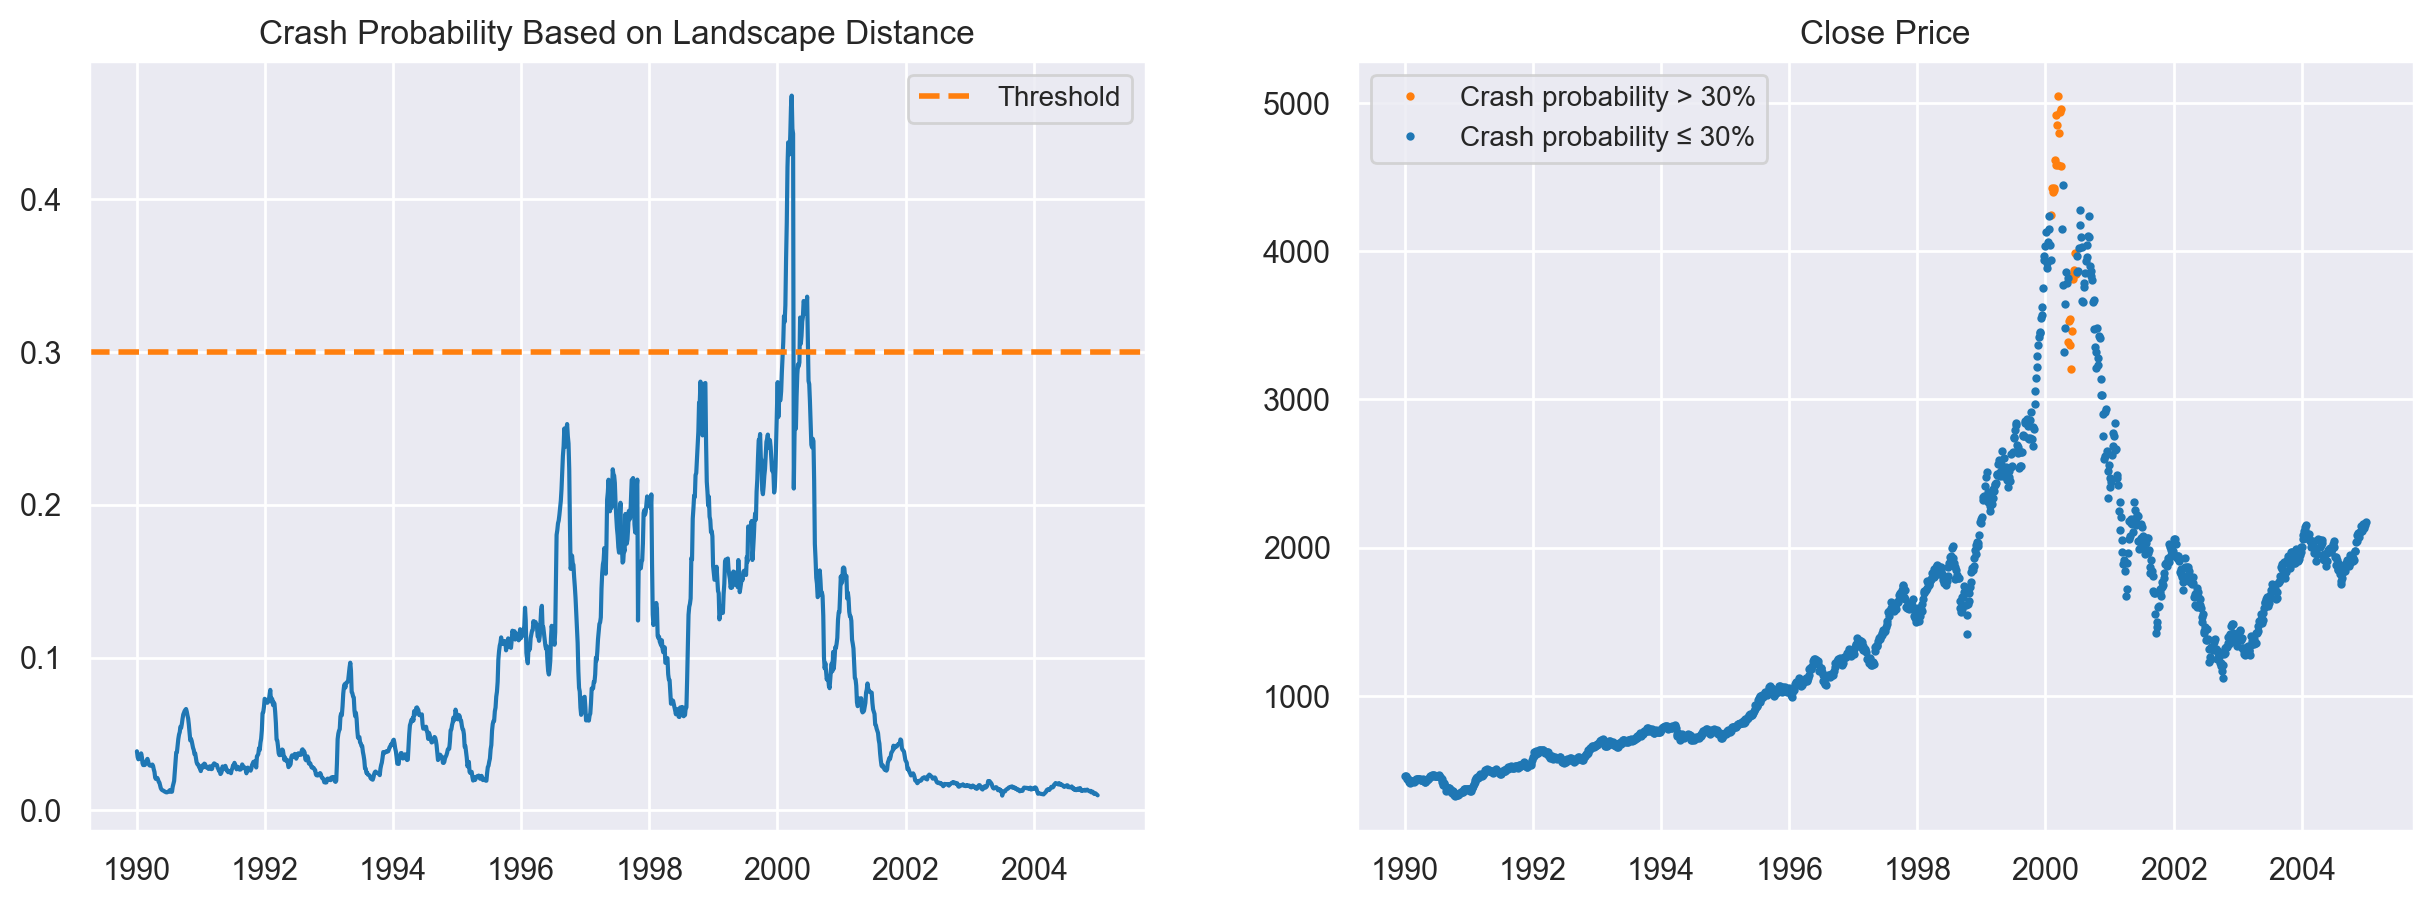

In [30]:
plot_crash_detections(
    start_date="1990-01-01",
    end_date="2005-01-01",
    threshold=0.3,
    distances=landscape_succ_dists,
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
    metric_name='Landscape Distance'
)

From the plot on the right-hand side we see that our simple metric has been able to correctly identify the region in time when the dot-com bubble began to burst! Let's now examine the financial crisis from 2008:

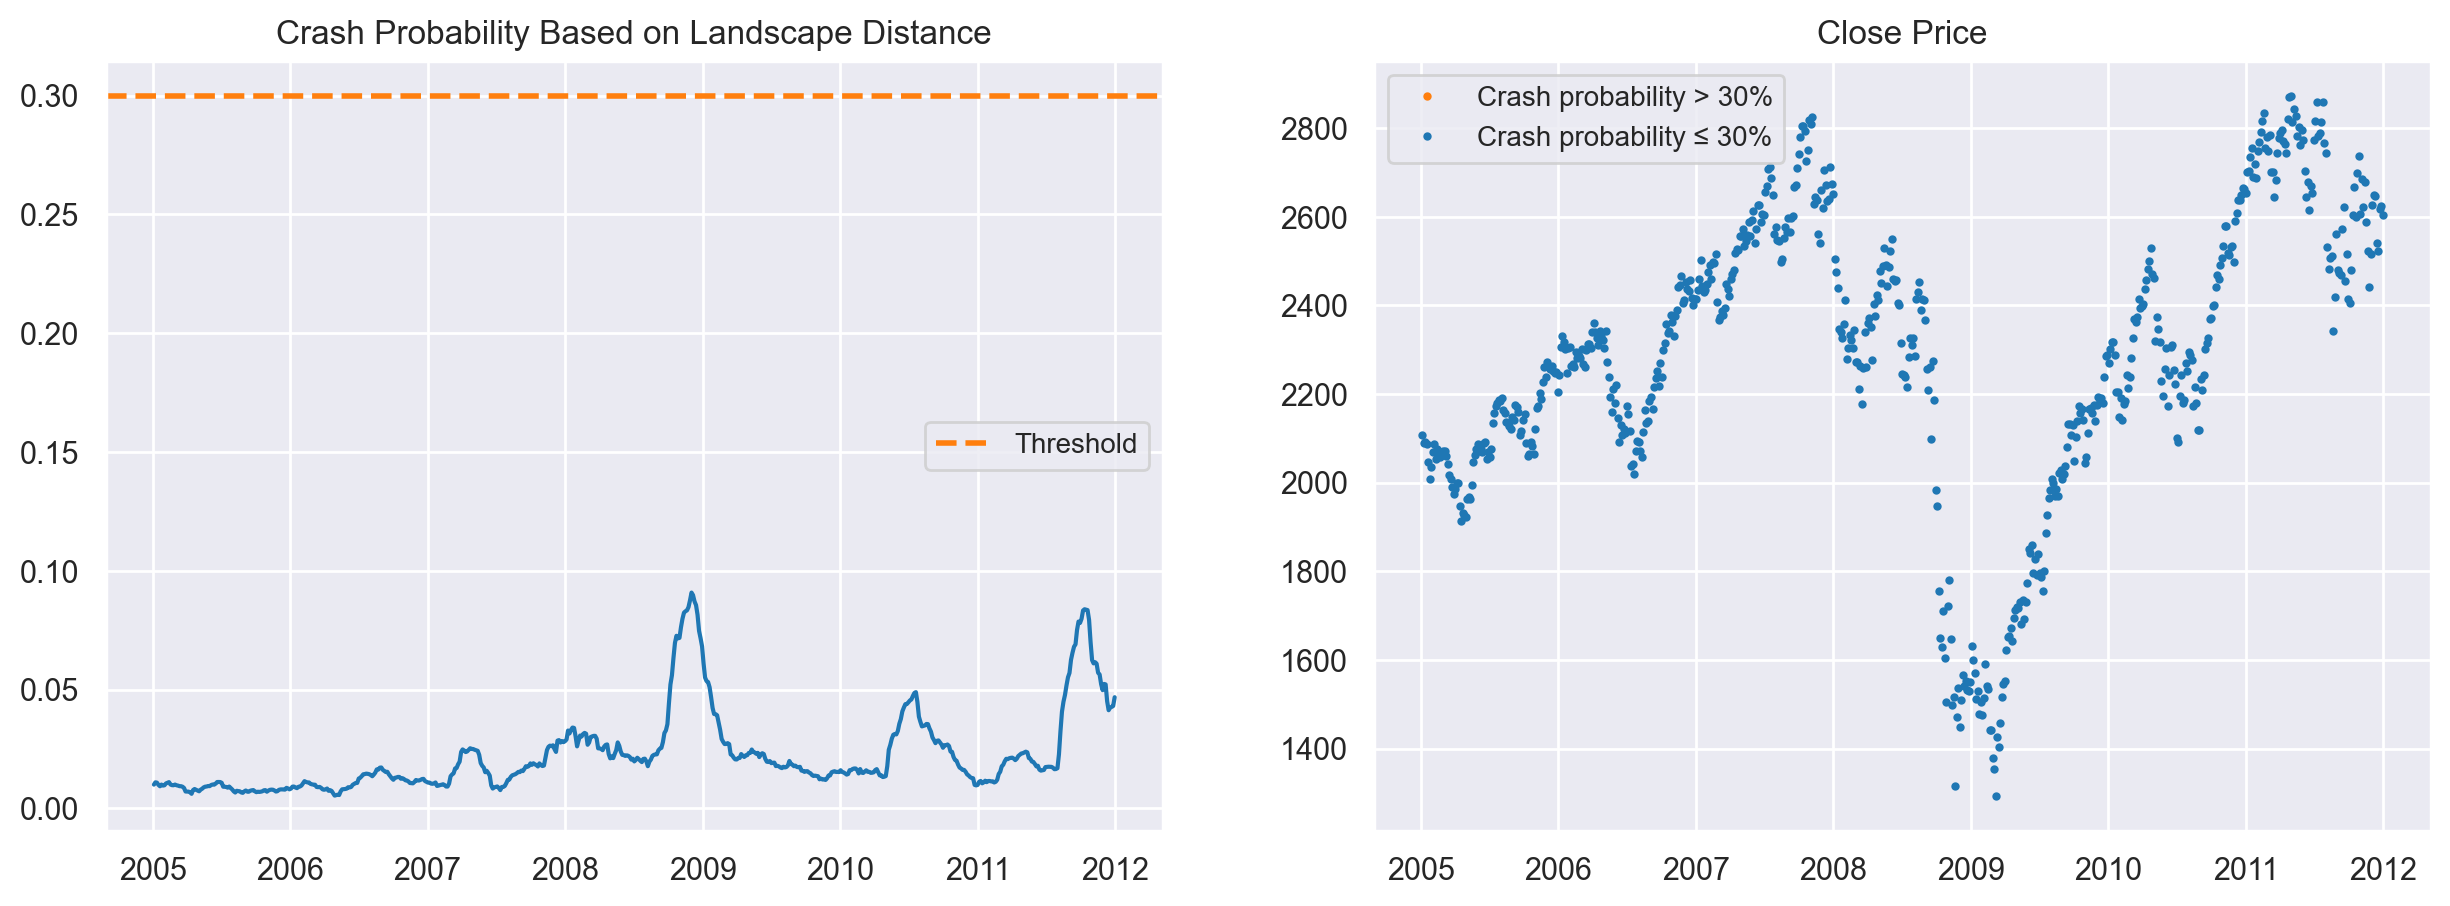

In [31]:
plot_crash_detections(
    start_date="2005-01-01",
    end_date="2012-01-01",
    threshold=0.3,
    distances=landscape_succ_dists,
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
    metric_name='Landscape Distance'
)

Again we see that the homological derivative has captured part of the region where the market was crashing. As a final comparison, let us compare the baseline model against our topological features:

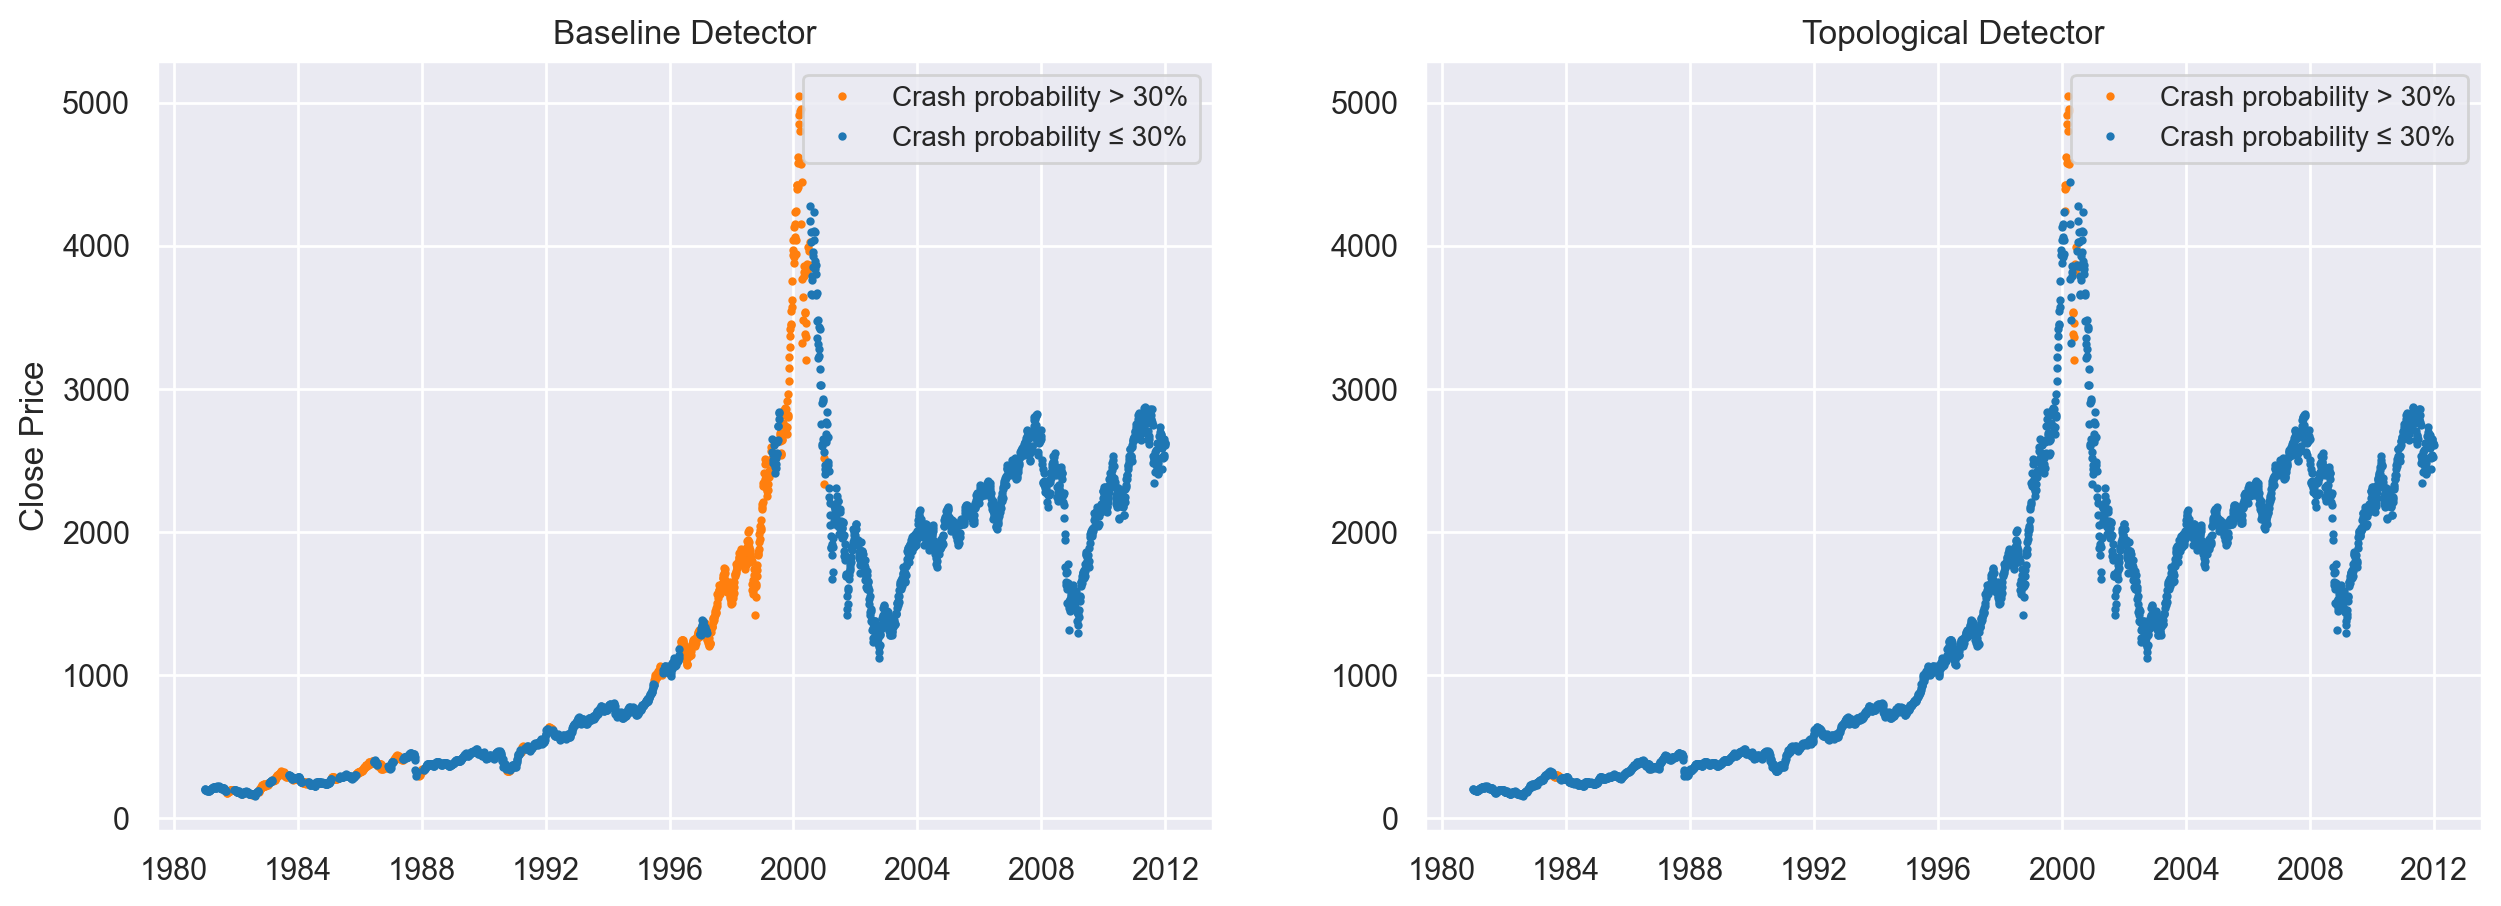

In [32]:
plot_crash_comparisons(
    start_date="1981-01-01",
    end_date="2012-01-01",
    threshold=0.3,
    distances_1=abs_derivative_of_means,
    distances_2=landscape_succ_dists,
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,
)